In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
import numpy as np
import scinot as sn
import openpyxl as xl
import os
from scipy.stats import ttest_ind
pd.__version__

'2.1.1'

In [49]:
temp = 'concatenado.csv'
temp_bars = pd.read_csv(temp)
temp_bars

,Test no,Test Name,Learner,Trainer,Num Eye,Selected,Correctness,Intensity,C1,C2,C3,C4,Date,Answering Time (ms),Sexo
0,1,vulnerabilidad,Ana,Giorgio,5,Preocupado,Correcto,7,Preocupado,Irritado,Sarcástico,Amistoso,[2023-11-26 22:31(39.309)],25562,Mujer
1,2,vulnerabilidad,Ana,Giorgio,6,Fantaseando,Correcto,3,Fantaseando,Horrorizado,Impaciente,Alarmado,[2023-11-26 22:31(56.563)],17253,Mujer
2,3,vulnerabilidad,Ana,Giorgio,10,Cauteloso,Correcto,4,Cauteloso,Insistente,Aburrido,Horrorizado,[2023-11-26 22:32(15.13)],18450,Mujer
3,4,vulnerabilidad,Ana,Giorgio,9,Hostil,Incorrecto,5,Preocupado,Molesto,Hostil,Aterrorizado,[2023-11-26 22:32(39.626)],24613,Mujer
4,5,vulnerabilidad,Ana,Giorgio,13,Tímido,Incorrecto,5,Anticipando,Decidido,Amenazante,Tímido,[2023-11-26 22:33(12.514)],32888,Mujer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,32,poder,Nicolas Villanueva,Yerko,14,Acusador,Correcto,5,Acusador,Irritado,Decepcionado,Deprimido,[2023-12-11 01:30(06.395)],2995,Hombre
1112,33,poder,Nicolas Villanueva,Yerko,17,Dudoso,Correcto,7,Dudoso,Cariñoso,Juguetón,Horrorizado,[2023-12-11 01:30(10.591)],4195,Hombre
1113,34,poder,Nicolas Villanueva,Yerko,13,Tímido,Incorrecto,5,Anticipando,Decidido,Amenazante,Tímido,[2023-12-11 01:30(16.219)],5628,Hombre
1114,35,poder,Nicolas Villanueva,Yerko,26,Hostil,Correcto,3,Hostil,Alarmado,Tímido,Ansioso,[2023-12-11 01:30(18.651)],2432,Hombre


In [50]:
temp_bars.describe()

,Test no,Num Eye,Intensity,Answering Time (ms)
count,1116.000000,1116.000000,1116.000000,1116.000000
mean,19.693548,18.500000,5.216846,12673.003584
std,12.279597,10.392952,1.432337,11560.717860
min,1.000000,1.000000,1.000000,933.000000
25%,10.000000,9.750000,4.000000,5854.000000
50%,19.000000,18.500000,5.000000,8743.000000
75%,28.000000,27.250000,6.000000,14787.250000
max,73.000000,36.000000,7.000000,106479.000000


In [51]:
temp_bars[' Test Name'].value_counts()

 Test Name
 poder             576
 vulnerabilidad    540
Name: count, dtype: int64

In [52]:
temp_bars[' Correctness'].value_counts()

 Correctness
 Correcto      734
 Incorrecto    382
Name: count, dtype: int64

In [53]:
K_aciertos = temp_bars[' Correctness'].value_counts().iloc[0]
N_datos = temp_bars.shape[0]
print('Cantidad de aciertos:', K_aciertos, 'Total de experimentos:', N_datos)
p = 0.5
res = stats.binomtest(K_aciertos, N_datos, p, alternative = 'greater')
if (res.pvalue < 0.05):
    print('El sujeto ha tenido un:', K_aciertos / N_datos * 100, '% de acierto (p =', res.pvalue, '< 0.05)')
else:
    print('No se encontró evidencia estadística para afirmar que el sujeto ha tenido un porcentaje de acierto diferente del 50%')

Cantidad de aciertos: 734 Total de experimentos: 1116
El sujeto ha tenido un: 65.77060931899642 % de acierto (p = 1.555755010977115e-26 < 0.05)


In [54]:
contigency_all = pd.crosstab(temp_bars[' Correctness'], temp_bars[' Test Name'], normalize = 'columns')
contigency_all

Test Name,poder,vulnerabilidad
Correctness,,
Correcto,0.65625,0.659259
Incorrecto,0.34375,0.340741


<Axes: xlabel=' Test Name', ylabel=' Correctness'>

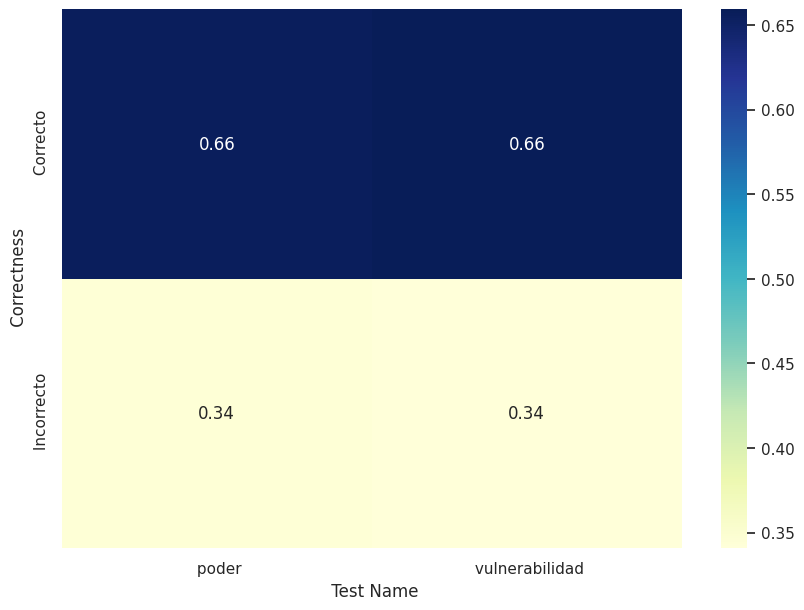

In [55]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")
plt.figure(figsize = (10, 7))
sns.heatmap(contigency_all, annot = True, cmap = "YlGnBu", color='blue')

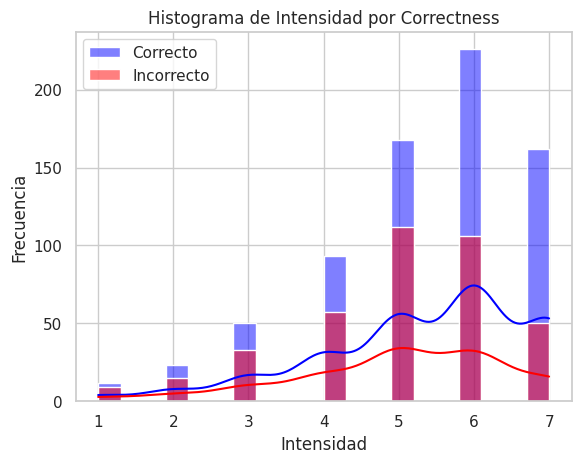

In [56]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")
# Crear un histograma para respuestas correctas
sns.histplot(data=temp_bars[temp_bars[' Correctness'] == ' Correcto'], x=' Intensity', bins=20, kde=True, color='blue', label='Correcto')

# Crear un histograma para respuestas incorrectas
sns.histplot(data=temp_bars[temp_bars[' Correctness'] == ' Incorrecto'], x=' Intensity', bins=20, kde=True, color='red', label='Incorrecto')

# Configurar el gráfico
plt.title('Histograma de Intensidad por Correctness')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

In [57]:
c, p, dof, expected = stats.chi2_contingency(contigency_all)

print("Valor de p: ", p)
if(p < 0.05):
    print("No se rechaza la hipotesis nula")
    

Valor de p:  1.0


In [58]:
comb = combinations(range(1, 10), 4)
comb_list = list(comb)

In [59]:
correct_values = temp_bars[' Correctness'].value_counts()
correct_values

 Correctness
 Correcto      734
 Incorrecto    382
Name: count, dtype: int64

In [60]:
# Contar la cantidad de personas que eligieron cada opción en la columna "Test Name"
count_per_option = temp_bars[' Test Name'].value_counts()
count_per_option = count_per_option / 36
# Mostrar el resultado
count_per_option

 Test Name
 poder             16.0
 vulnerabilidad    15.0
Name: count, dtype: float64

In [61]:
poder_data = temp_bars[temp_bars[' Test Name'] == ' poder']
vulnerabilidad_data = temp_bars[temp_bars[' Test Name'] == ' vulnerabilidad']

In [62]:
def analyze_data_intensity(data, test_name):
    # Realizar el análisis específico para cada conjunto de datos (data)
    
    # Ejemplo de análisis: Calcular estadísticas del tiempo de respuesta
    response_intensity = data[' Intensity']
    mean_response_intensity = response_intensity.mean()
    median_response_intensity = response_intensity.median()
    min_response_intensity = response_intensity.min()
    max_response_intensity = response_intensity.max()
    std_response_intensity = response_intensity.std()
    
    print('Análisis de intensidad para', test_name)
    print('Media de la intensidad', mean_response_intensity)
    print('Mediana de la intensidad:', median_response_intensity)
    print('Respuesta de intensidad mínimo:', min_response_intensity)
    print('Respuesta de intensidad máximo:', max_response_intensity)
    print('Desviación estándar de la intensidad:', std_response_intensity)
    
    # Puedes continuar con otros análisis específicos para el tiempo de respuesta

# Llamar a la función para analizar los tiempos de respuesta de "poder"
analyze_data_intensity(poder_data, "poder")
print("\n")
# Llamar a la función para analizar los tiempos de respuesta de "vulnerabilidad"
analyze_data_intensity(vulnerabilidad_data, "vulnerabilidad")

Análisis de intensidad para poder
Media de la intensidad 5.267361111111111
Mediana de la intensidad: 5.0
Respuesta de intensidad mínimo: 1
Respuesta de intensidad máximo: 7
Desviación estándar de la intensidad: 1.3998921628585719


Análisis de intensidad para vulnerabilidad
Media de la intensidad 5.162962962962963
Mediana de la intensidad: 5.0
Respuesta de intensidad mínimo: 1
Respuesta de intensidad máximo: 7
Desviación estándar de la intensidad: 1.46553431672722


In [63]:
def analyze_data_time(data, test_name):
    # Realizar el análisis específico para cada conjunto de datos (data)
    
    # Ejemplo de análisis: Calcular estadísticas del tiempo de respuesta
    response_times = data[' Answering Time (ms)']
    mean_response_time = response_times.mean()
    median_response_time = response_times.median()
    min_response_time = response_times.min()
    max_response_time = response_times.max()
    std_response_time = response_times.std()
    
    print('Análisis de tiempos de respuesta para', test_name)
    print('Media del tiempo de respuesta:', mean_response_time)
    print('Mediana del tiempo de respuesta:', median_response_time)
    print('Tiempo de respuesta mínimo:', min_response_time)
    print('Tiempo de respuesta máximo:', max_response_time)
    print('Desviación estándar del tiempo de respuesta:', std_response_time)
    
    # Puedes continuar con otros análisis específicos para el tiempo de respuesta

# Llamar a la función para analizar los tiempos de respuesta de "poder"
analyze_data_time(poder_data, "poder")
print("\n")
# Llamar a la función para analizar los tiempos de respuesta de "vulnerabilidad"
analyze_data_time(vulnerabilidad_data, "vulnerabilidad")

Análisis de tiempos de respuesta para poder
Media del tiempo de respuesta: 12520.671875
Mediana del tiempo de respuesta: 8596.0
Tiempo de respuesta mínimo: 933
Tiempo de respuesta máximo: 106479
Desviación estándar del tiempo de respuesta: 11777.60939151504


Análisis de tiempos de respuesta para vulnerabilidad
Media del tiempo de respuesta: 12835.49074074074
Mediana del tiempo de respuesta: 8905.5
Tiempo de respuesta mínimo: 2085
Tiempo de respuesta máximo: 77925
Desviación estándar del tiempo de respuesta: 11333.443317144163


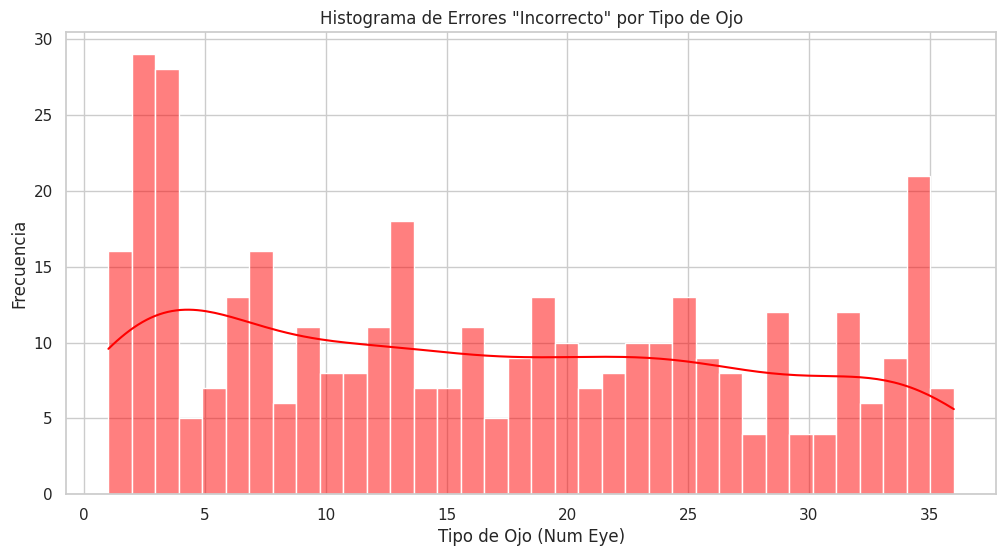

In [64]:
# Filtrar los datos por errores "Incorrecto"
df_incorrecto = temp_bars[temp_bars[' Correctness'] == ' Incorrecto']

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear un histograma con sns.histplot
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.histplot(data=df_incorrecto, x='Num Eye', bins=len(df_incorrecto['Num Eye'].unique()), kde=True, color='red')
plt.title('Histograma de Errores "Incorrecto" por Tipo de Ojo')
plt.xlabel('Tipo de Ojo (Num Eye)')
plt.ylabel('Frecuencia')
plt.show()

Prueba t de Student - Estadística: -0.5476990567977228, Valor p: 0.5842201104560704


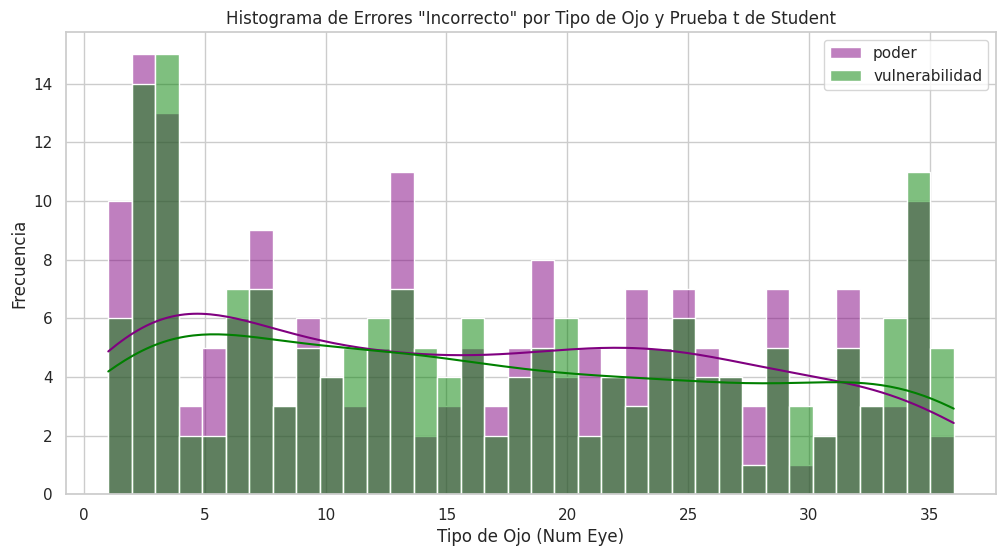

In [67]:
# Filtrar los datos por errores "Incorrecto"
df_incorrecto = temp_bars[temp_bars[' Correctness'] == ' Incorrecto']

# Filtrar datos para cada grupo
df_poder = df_incorrecto[df_incorrecto[' Test Name'] == ' poder']
df_vulnerabilidad = df_incorrecto[df_incorrecto[' Test Name'] == ' vulnerabilidad']

# Realizar la prueba t de Student
t_statistic, p_value = ttest_ind(df_poder['Num Eye'], df_vulnerabilidad['Num Eye'])

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear un histograma para cada grupo
plt.figure(figsize=(12, 6))

# Histograma para el grupo "poder"
sns.histplot(data=df_poder, x='Num Eye', bins=len(df_poder['Num Eye'].unique()), kde=True, color='purple', label='poder')

# Histograma para el grupo "vulnerabilidad"
sns.histplot(data=df_vulnerabilidad, x='Num Eye', bins=len(df_vulnerabilidad['Num Eye'].unique()), kde=True, color='green', label='vulnerabilidad')

plt.title('Histograma de Errores "Incorrecto" por Tipo de Ojo y Prueba t de Student')
plt.xlabel('Tipo de Ojo (Num Eye)')
plt.ylabel('Frecuencia')

# Mostrar leyenda
plt.legend()

# Mostrar resultados de la prueba t
print(f"Prueba t de Student - Estadística: {t_statistic}, Valor p: {p_value}")

plt.show()

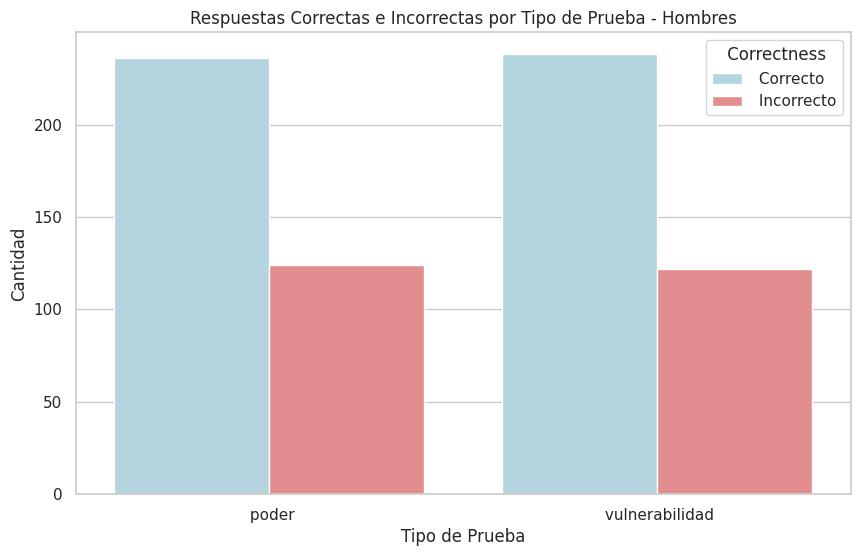

In [90]:
# Supongamos que tu DataFrame se llama 'df'
# Filtrar por género "Hombre"
df_hombres = temp_bars[temp_bars[' Sexo'] == ' Hombre']

# Crear un gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

colores = sns.color_palette(['lightblue', 'lightcoral'])
# Usar countplot para contar la cantidad de respuestas correctas e incorrectas para cada tipo de prueba
sns.countplot(x=' Test Name', hue=' Correctness', data=df_hombres, palette=colores)

# Añadir etiquetas y título
plt.title('Respuestas Correctas e Incorrectas por Tipo de Prueba - Hombres')
plt.xlabel('Tipo de Prueba')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

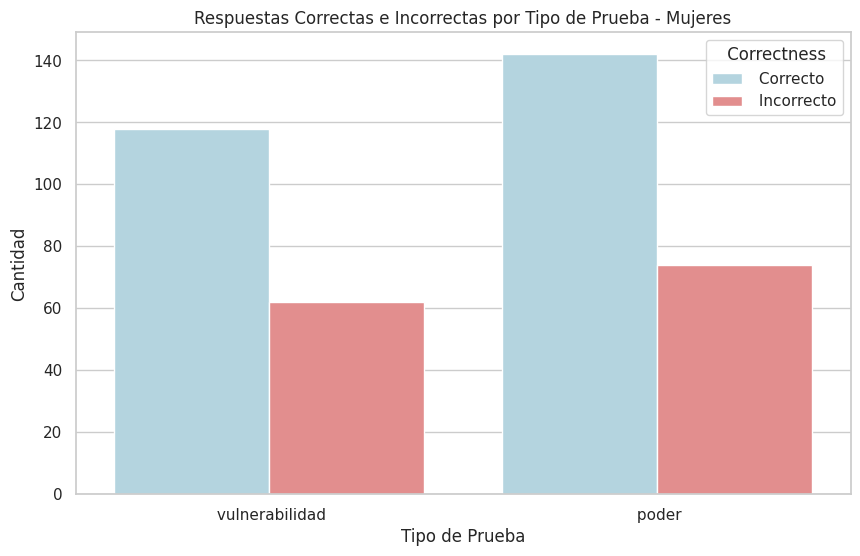

In [89]:
# Supongamos que tu DataFrame se llama 'df'
# Filtrar por género "Hombre"
df_mujer = temp_bars[temp_bars[' Sexo'] == ' Mujer']

# Crear un gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

colores = sns.color_palette(['lightblue', 'lightcoral'])
# Usar countplot para contar la cantidad de respuestas correctas e incorrectas para cada tipo de prueba
sns.countplot(x=' Test Name', hue=' Correctness', data=df_mujer, palette=colores)

# Añadir etiquetas y título
plt.title('Respuestas Correctas e Incorrectas por Tipo de Prueba - Mujeres')
plt.xlabel('Tipo de Prueba')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()